In [52]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [53]:
import pandas as pd
import matplotlib as plt
import seaborn as sbn
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler
from scipy import stats
warnings.filterwarnings('ignore')
%matplotlib inline

df_train = pd.read_csv("train.csv") #read the file where we analyze the data

df_train.columns #output all variable names


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

By looking at the detailed information in _data_description.txt_ we can filter the variables into a smaller and more meaningful list to aid in our calculation :
- 'OverallQual' ( albeit being too general )
- 'OverallCond' ( also quite general )
- 'YearBuilt'
- 'GrLivArea'
- 'MSZoning'

# Analyzing SalePrice and its distribution

In [54]:
df_train['SalePrice'].describe() #output the number of unique prices, their mean and standard deviation for further analyzing

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

 As we can see, there is a sizeable difference between the minimum and maximum values for SalePrice, which might influence our calculations in a wrong way. These "out of place" values are called _outliers_ and we will get to them later.

Now we want to observe how the distribution graph looks like and find out whether the Skewness and Kurtosis is positive or negative.

Skewness is : 1.8828757597682129
Kurtosis is : 6.536281860064529


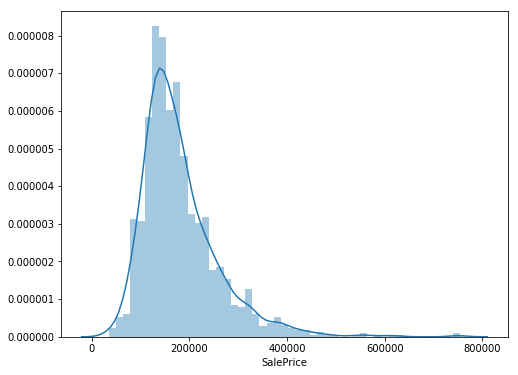

In [55]:
f, ax = plt.pyplot.subplots(figsize=(8, 6))
sbn.distplot(df_train['SalePrice']);
print("Skewness is :", df_train['SalePrice'].skew())
print("Kurtosis is :", df_train['SalePrice'].kurt())

A positive skewness implies that the values deviate from normal distribution and they tend to be closer to the lower bound, additionally a higher than normal kurtosis shows that that distribution has a very sharp peak thus the long tail extends beyond the mean by a few standard deviations.
Therefore we can conclude that a vast majority of houses are priced at 180921± one standard deviation ( which in our case is ~79442).

# Observing the correlation between our filtered variables and SalePrice

## Numerical variables

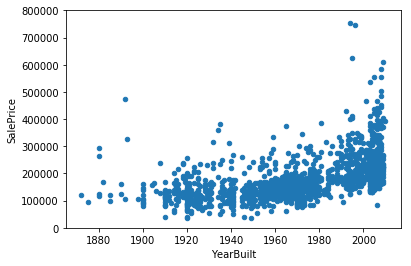

In [56]:
#scatter plot of YearBuilt/SalePrice
var = "YearBuilt"
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
data.plot.scatter(x=var, y='SalePrice', ylim= (0,800000));

At a first glance we can see a weak linear relationship between the two values, additionally it seems that a vast majority of our houses are built after the '50s.

Next up is 'GrLivArea'.

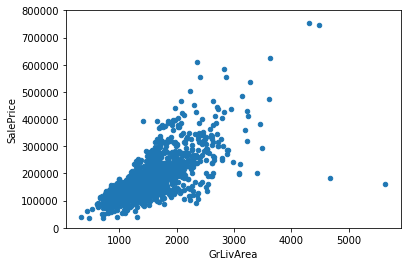

In [57]:
#scatter plot of GrLivArea/SalePrice
var = "GrLivArea"
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
data.plot.scatter(x=var, y='SalePrice', ylim= (0,800000));

On the other hand, the relationship between _GrLivArea_ and _SalePrice_ denotes a strong linearity, thus this variable has a stronger impact on our sale price.

## Categorical Values

First up is _OverallQual_.

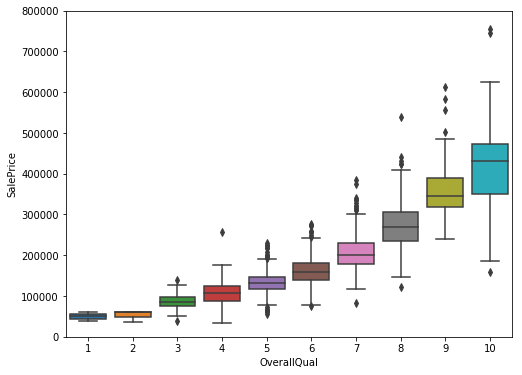

In [58]:
var = "OverallQual"
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
f, ax = plt.pyplot.subplots(figsize=(8, 6))
box = sbn.boxplot(x= var, y = 'SalePrice', data = data)
box.axis(ymin = 0, ymax = 800000);

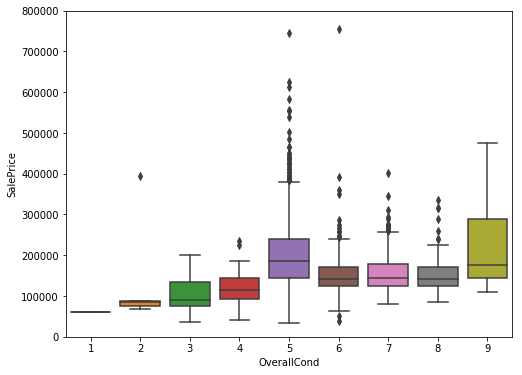

In [59]:
var = "OverallCond"
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
f, ax = plt.pyplot.subplots(figsize=(8, 6))
box = sbn.boxplot(x= var, y = 'SalePrice', data = data)
box.axis(ymin = 0, ymax = 800000);

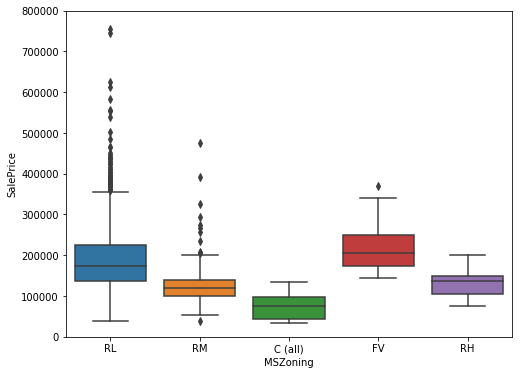

In [60]:
var = "MSZoning"
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
f, ax = plt.pyplot.subplots(figsize=(8, 6))
box = sbn.boxplot(x= var, y = 'SalePrice', data = data)
box.axis(ymin = 0, ymax = 800000);

# Observing the correlation between all variables

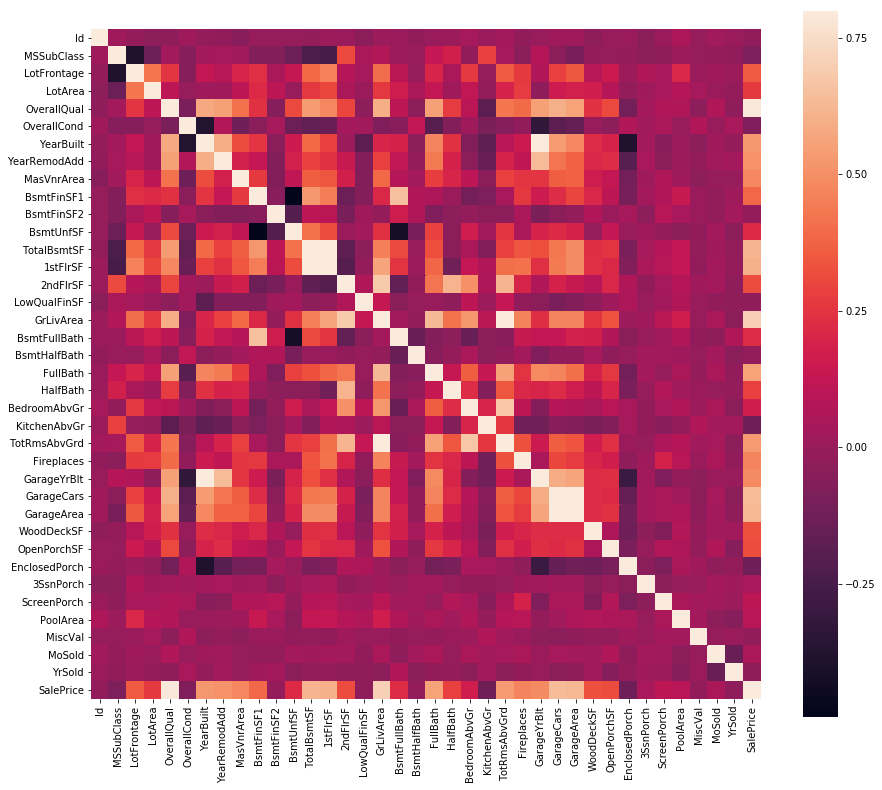

In [61]:
corrdata = df_train.corr()
plt.pyplot.subplots(figsize=(15, 13))
sbn.heatmap(corrdata,square = True, vmax = 0.8);

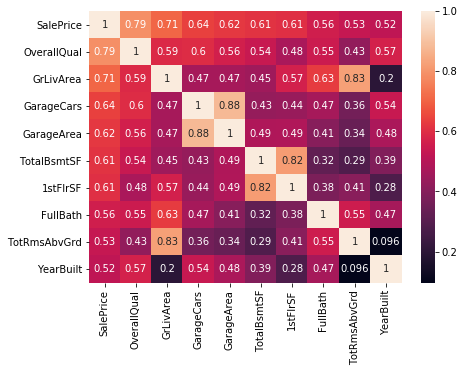

In [62]:
cols = corrdata.nlargest(10,'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
plt.pyplot.subplots(figsize=(7, 5))
sbn.heatmap(cm, annot = True, yticklabels = cols.values, xticklabels = cols.values);

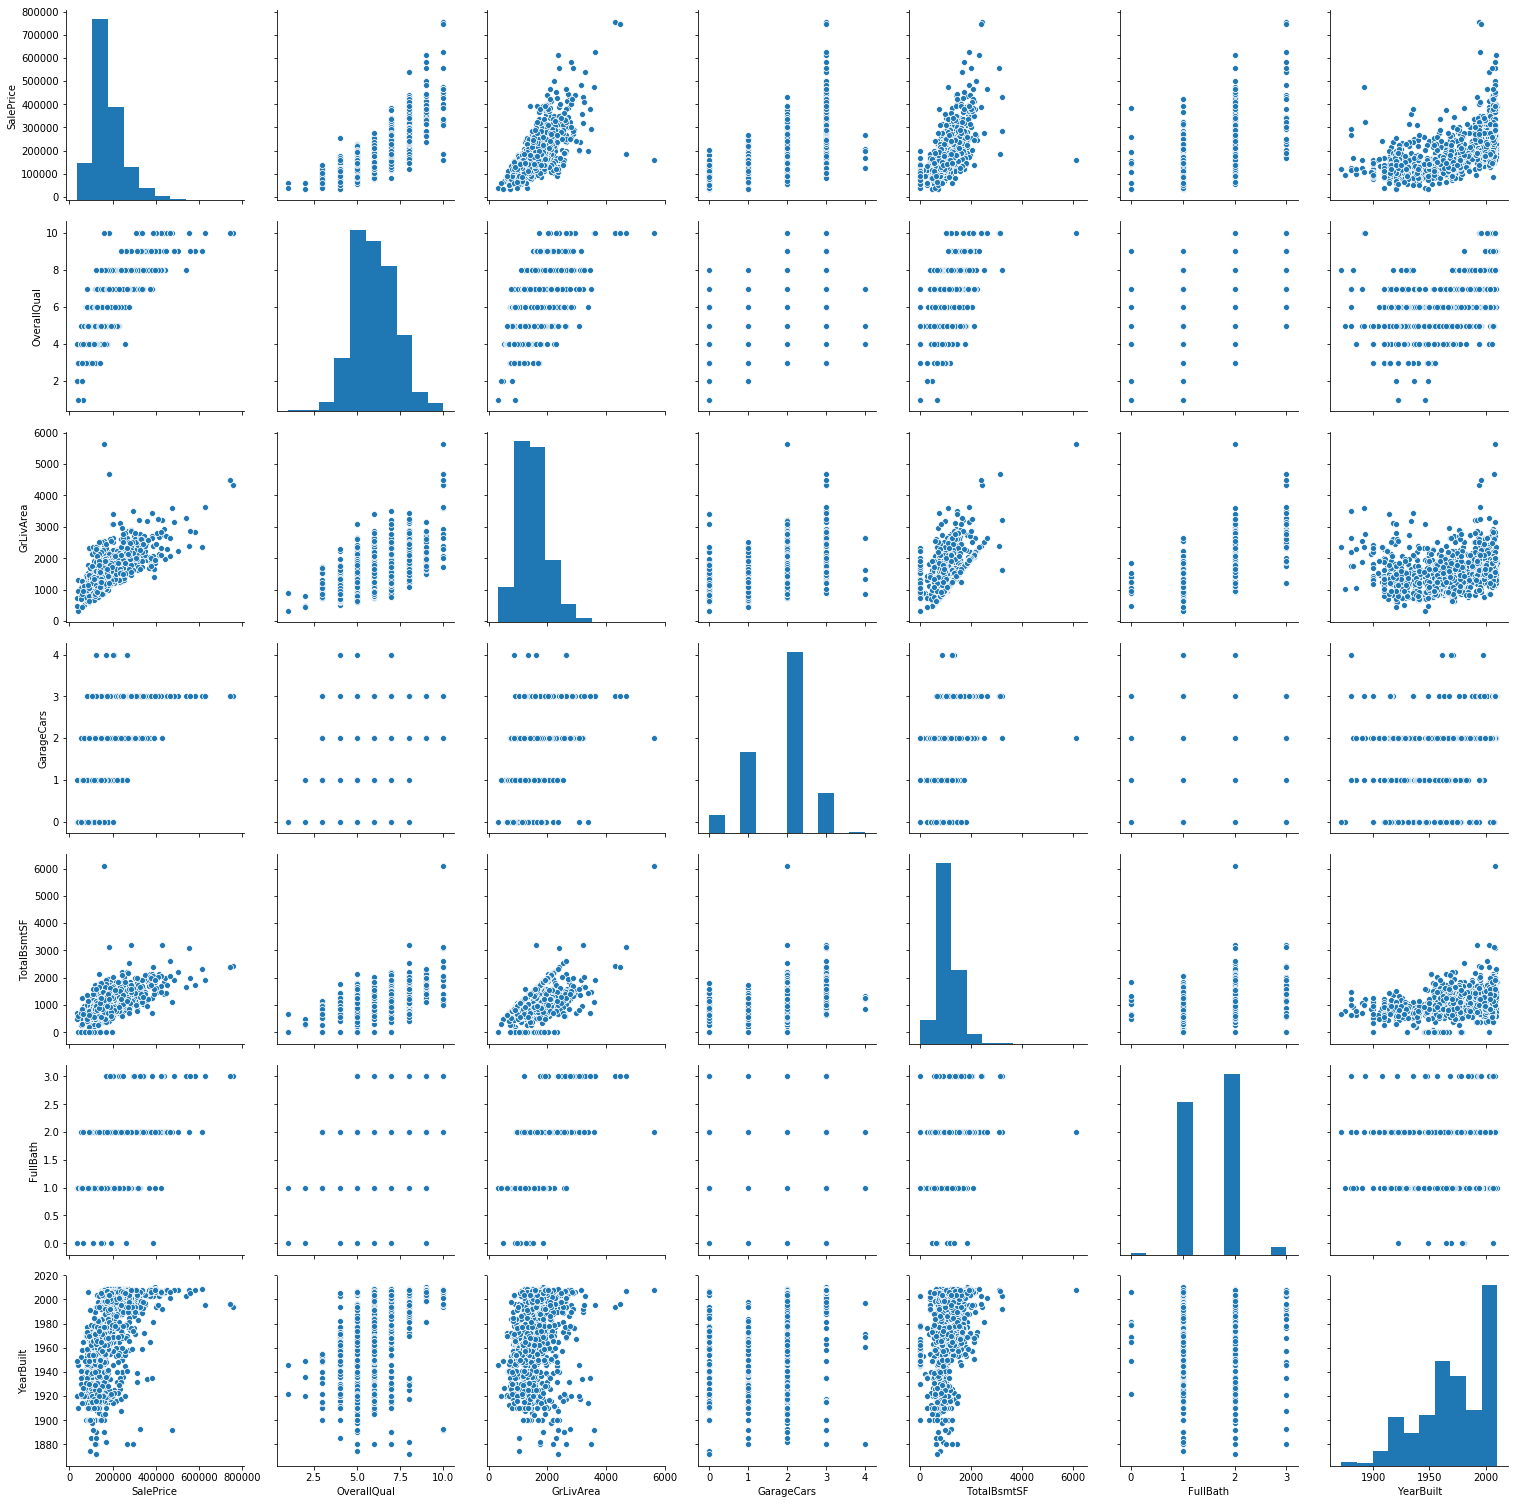

In [63]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sbn.pairplot(df_train[cols], size = 3);

# Missing Data

In [64]:
total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values( ascending = False)
missing_data = pd.concat([total,percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [65]:
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index, 1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max()

0

## Univariate analysis

In [66]:
saleprice_std = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_std[saleprice_std[:,0].argsort()][:10]
high_range = saleprice_std[saleprice_std[:,0].argsort()][-10:]
print('The lower range of the distribution is : \n',low_range,'\n')
print('The higher range of the distribution is : \n',high_range)

The lower range of the distribution is : 
 [[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]] 

The higher range of the distribution is : 
 [[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


## Multivariate analysis

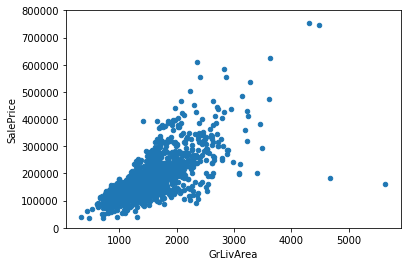

In [67]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice', ylim = (0, 800000));

In [68]:
df_train.sort_values( by = 'GrLivArea', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [69]:
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

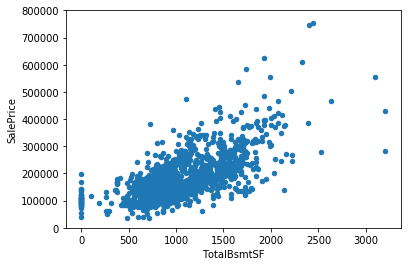

In [70]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice', ylim = (0, 800000));

In [71]:
df_train.sort_values( by = 'TotalBsmtSF', ascending = False)[['Id','TotalBsmtSF']][:3]


,Id,TotalBsmtSF
332,333,3206
496,497,3200
440,441,3094


In [72]:
df_train = df_train.drop(df_train[df_train['Id'] == 333].index)
df_train = df_train.drop(df_train[df_train['Id'] == 497].index)
df_train = df_train.drop(df_train[df_train['Id'] == 441].index)

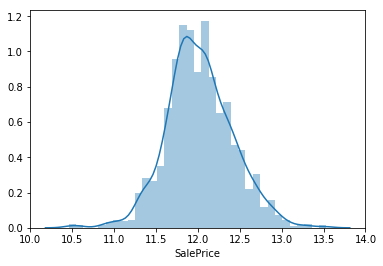

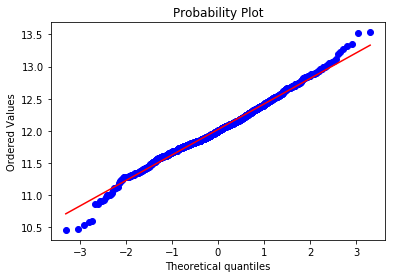

In [73]:
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])
sbn.distplot(df_train['SalePrice']);
fig = plt.pyplot.figure()
stats.probplot(df_train['SalePrice'], plot = plt.pyplot);

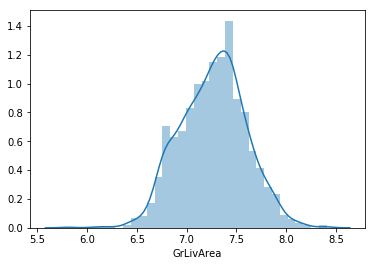

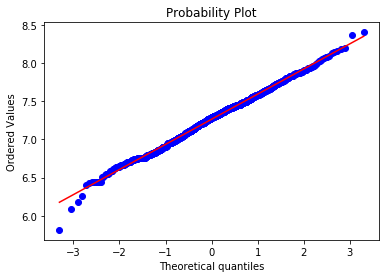

In [74]:
df_train['GrLivArea'] = np.log1p(df_train['GrLivArea'])
sbn.distplot(df_train['GrLivArea'])
fig = plt.pyplot.figure()
stats.probplot(df_train['GrLivArea'], plot = plt.pyplot);

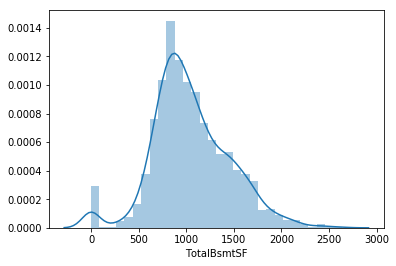

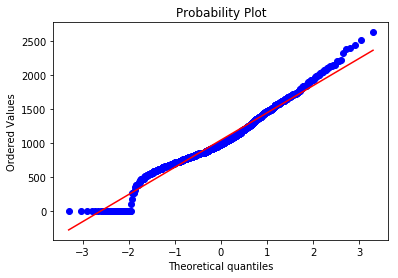

In [75]:
sbn.distplot(df_train['TotalBsmtSF'])
fig = plt.pyplot.figure()
stats.probplot(df_train['TotalBsmtSF'], plot = plt.pyplot);

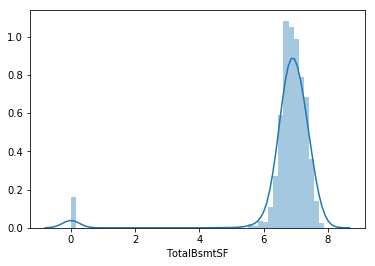

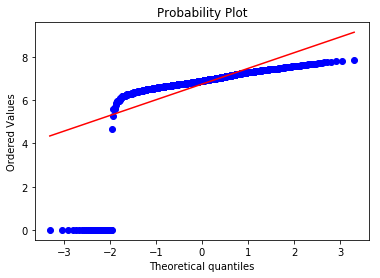

In [76]:
df_train['TotalBsmtSF'] = np.log1p(df_train['TotalBsmtSF'])
sbn.distplot(df_train['TotalBsmtSF'])
fig = plt.pyplot.figure()
stats.probplot(df_train['TotalBsmtSF'], plot = plt.pyplot);

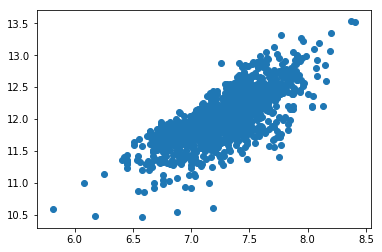

In [77]:
plt.pyplot.scatter(df_train['GrLivArea'], df_train['SalePrice']);

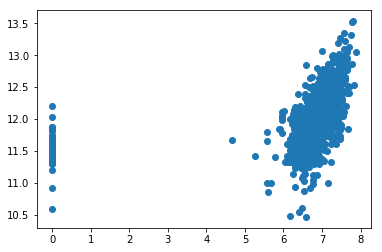

In [78]:
plt.pyplot.scatter(df_train['TotalBsmtSF'],df_train['SalePrice']);

(1454, 5)
Index(['GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt'], dtype='object')
(1090,)
R2 is : 0.7957174371106568
RMSE is : 0.033504641106376874


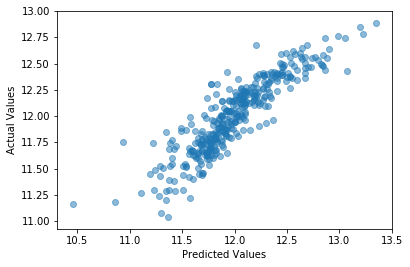

In [80]:
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df_test = pd.read_csv("test.csv")
y = df_train.SalePrice

data = df_train[['GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]

X = data

print(X.shape)

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 420, test_size = 0.25)

clf = linear_model.LinearRegression()

print(X_train.columns)
print(y_train.shape)
clf.fit(X_train,y_train)


print("R2 is :",clf.score(X_test, y_test))
pred = clf.predict(X_test)
print("RMSE is :", mean_squared_error(y_test, pred))


actual_values = y_test
plt.scatter(actual_values,pred, alpha = 0.5)
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

In [115]:
#features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
df_test[['GrLivArea', 'TotalBsmtSF']] = np.log1p(df_test[['GrLivArea', 'TotalBsmtSF']])
feats = df_test[['GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]
feats.fillna(0, inplace = True)

pred = clf.predict(feats)
prediction_final = np.expm1(pred)

print("Initial prediction:", pred[:10], "\n")
print("Final prediction :", prediction_final[:10])

Initial prediction: [11.60306628 11.86428755 12.24417139 12.23843485 12.08573426 12.22675816
 12.03259487 12.1718972  12.12146629 11.74731722] 

Final prediction : [109431.83656474 142099.17613542 207765.76034569 206577.31054662
 177323.07319525 204179.18817506 168146.16638583 193279.38858898
 183773.784489   126412.96224791]


In [130]:
submission = pd.DataFrame()
submission['Id'] = df_test.Id

submission['SalePrice'] = prediction_final

submission.to_csv('submission.csv', index = False)

In [131]:
submission.describe()

,Id,SalePrice
count,1459.000000,1459.000000
mean,2190.000000,175958.407971
std,421.321334,62793.388854
min,1461.000000,52542.390177
25%,1825.500000,126887.455312
50%,2190.000000,166561.888518
75%,2554.500000,212213.272473
max,2919.000000,555554.683432
